In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv('Stock List.csv')
df = df[['symbol','date', 'open', 'high', 
         'low', 'close']]
df

,symbol,date,open,high,low,close
0,AAPL,2021-01-04,133.52,133.6116,126.760,129.41
1,AAPL,2021-01-05,128.89,131.7400,128.430,131.01
2,AAPL,2021-01-06,127.72,131.0499,126.382,126.60
3,AAPL,2021-01-07,128.36,131.6300,127.860,130.92
4,AAPL,2021-01-08,132.43,132.6300,130.230,132.05
...,...,...,...,...,...,...
16619,SNAP,2021-08-19,70.50,72.5450,70.400,70.86
16620,SNAP,2021-08-20,71.20,72.9699,70.800,72.72
16621,SNAP,2021-08-23,74.01,75.9300,73.670,75.50
16622,SNAP,2021-08-24,75.82,76.3700,73.720,74.63


In [77]:
# filter Apple stocks
df_stock = df[df['symbol'] == 'AAPL'].copy()
# convert date column from string to date
df_stock['date'] = pd.to_datetime(df_stock['date']) 
# filter records after 2017
df_stock = df_stock[df_stock['date'].dt.year > 2017] 
df_stock.reset_index(inplace=True)

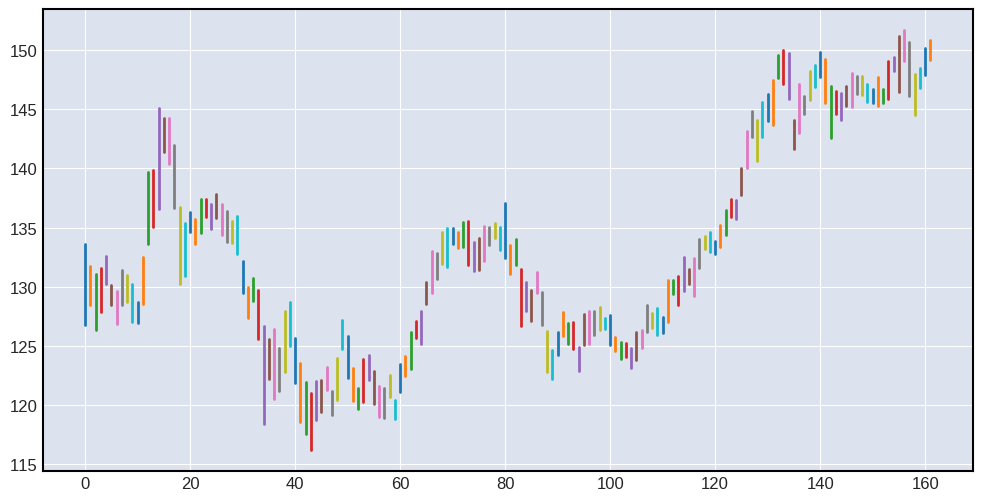

In [84]:
x = np.arange(0,len(df_stock))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df_stock.iterrows():
    plt.plot([x[idx], x[idx]], [val['low'], val['high']])

plt.show()

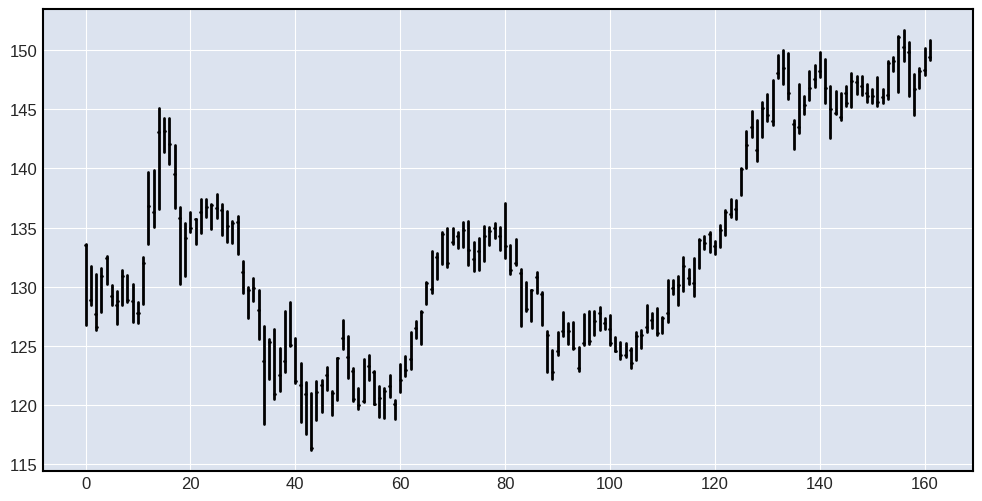

In [83]:
x = np.arange(0,len(df_stock))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df_stock.iterrows():
    # high/low lines
    plt.plot([x[idx], x[idx]], 
             [val['low'], val['high']], 
             color='black')
    # open marker
    plt.plot([x[idx], x[idx]-0.1], 
             [val['open'], val['open']], 
             color='black')
    # close marker
    plt.plot([x[idx], x[idx]+0.1], 
             [val['close'], val['close']], 
             color='black')

plt.show()


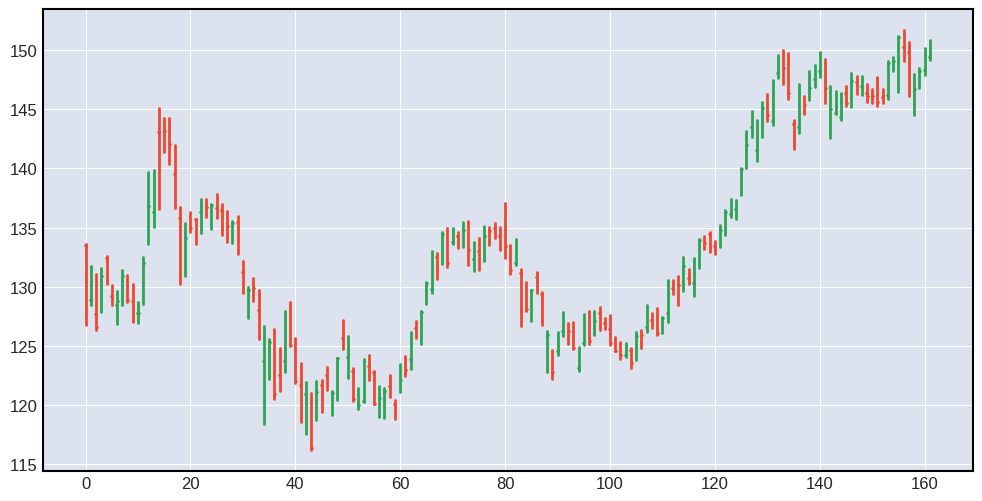

In [85]:
x = np.arange(0,len(df_stock))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df_stock.iterrows():
    color = '#2CA453'
    if val['open'] > val['close']: color= '#F04730'
    plt.plot([x[idx], x[idx]], 
             [val['low'], val['high']], 
             color=color)
    plt.plot([x[idx], x[idx]-0.1], 
             [val['open'], val['open']], 
             color=color)
    plt.plot([x[idx], x[idx]+0.1], 
             [val['close'], val['close']], 
             color=color)

plt.show()

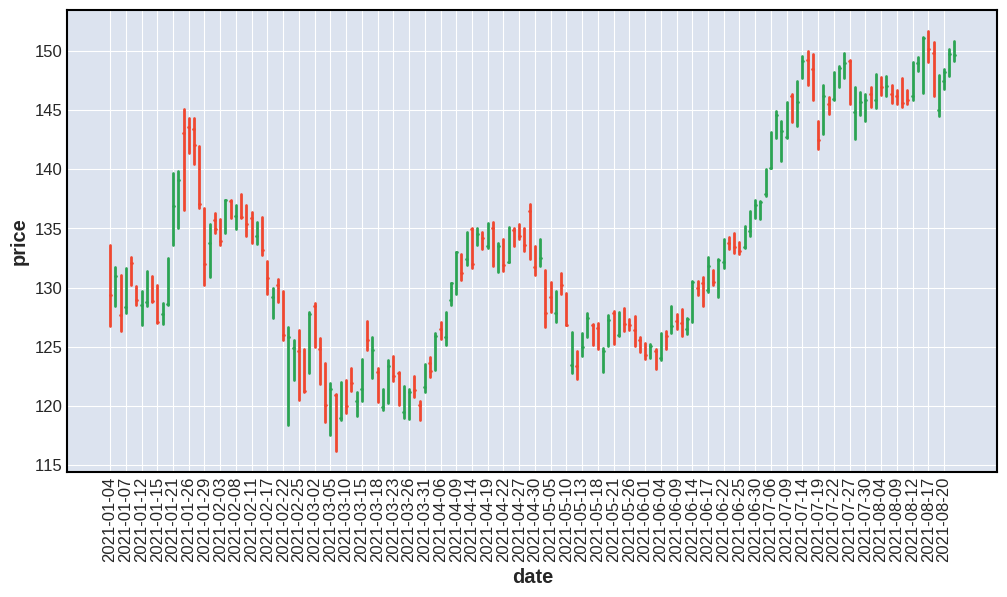

In [87]:
x = np.arange(0,len(df_stock))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df_apple.iterrows():
    color = '#2CA453'
    if val['open'] > val['close']: color= '#F04730'
    plt.plot([x[idx], x[idx]], 
             [val['low'], val['high']], 
             color=color)
    plt.plot([x[idx], x[idx]-0.1], 
             [val['open'], val['open']], 
             color=color)
    plt.plot([x[idx], x[idx]+0.1], 
             [val['close'], val['close']], 
             color=color)
    
# ticks
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(x[::3], df_apple.date.dt.date[::3],rotation = 90)
plt.show()

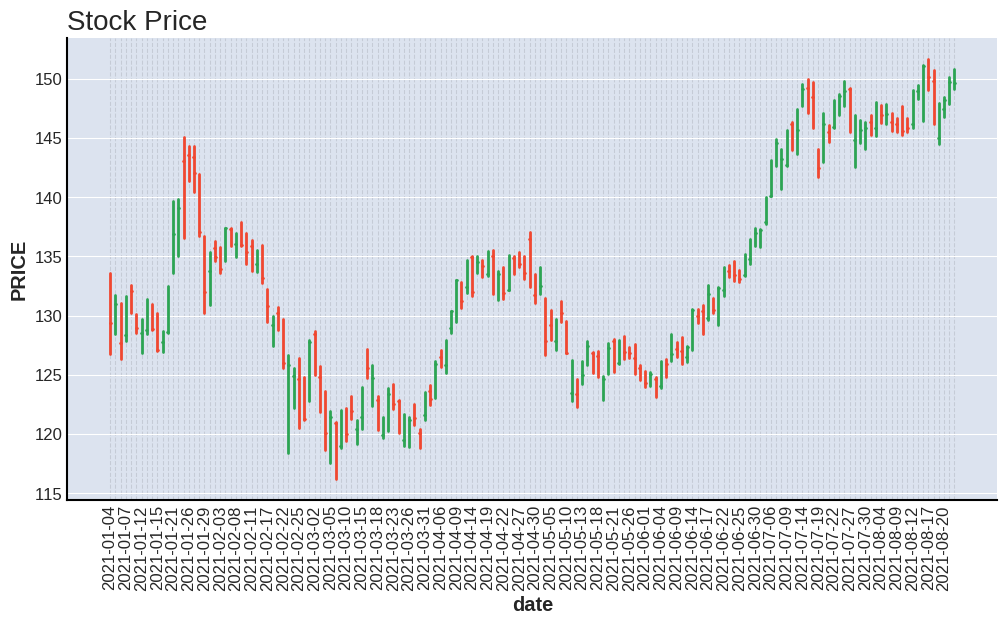

In [41]:
x = np.arange(0,len(df_stock))
fig, ax = plt.subplots(1, figsize=(12,6))
for idx, val in df_apple.iterrows():
    color = '#2CA453'
    if val['open'] > val['close']: color= '#F04730'
    plt.plot([x[idx], x[idx]], [val['low'], val['high']], color=color)
    plt.plot([x[idx], x[idx]-0.1], [val['open'], val['open']], color=color)
    plt.plot([x[idx], x[idx]+0.1], [val['close'], val['close']], color=color)
    
# ticks
plt.xticks(x[::3], df_apple.date.dt.date[::3],rotation=90)
ax.set_xticks(x, minor=True)
# labels
plt.ylabel('PRICE')
# grid
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# title
plt.title('Stock Price', loc='left', fontsize=20)
plt.xlabel('date')
plt.show()

In [24]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 667 kB/s 


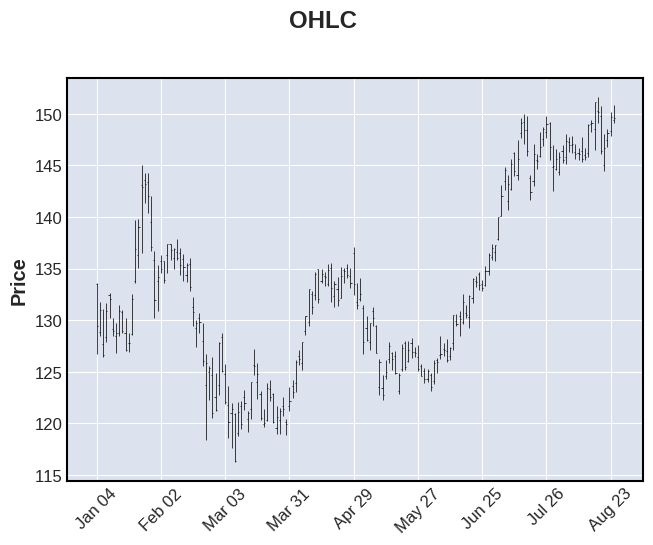

In [68]:
import mplfinance as mpf
df_google = df_stock[df_stock['symbol'] == 'AAPL'].copy()
df_google['date'] = pd.to_datetime(df_google['date'])
df_google = df_google[df_google['date'] > pd.to_datetime('2016-12-31')]
df_google = df_google.set_index('date')

mpf.plot(df_google,title='OHLC')

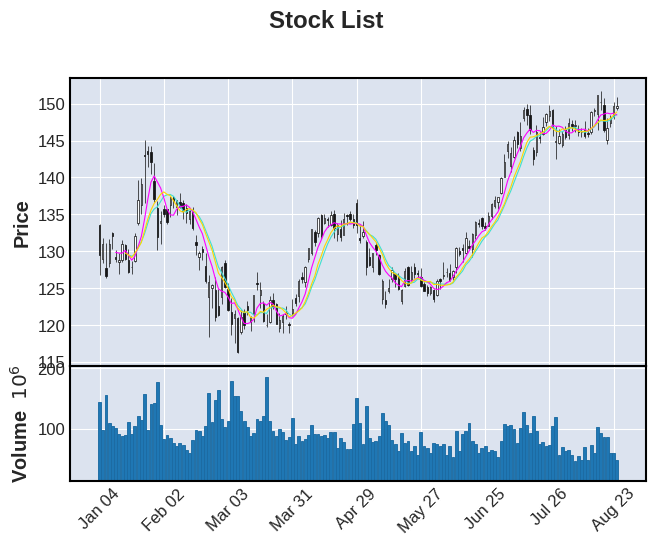

In [73]:
mpf.plot(df_google,type='candle',mav=(10, 6, 9),volume=True, title='Stock List')
